First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

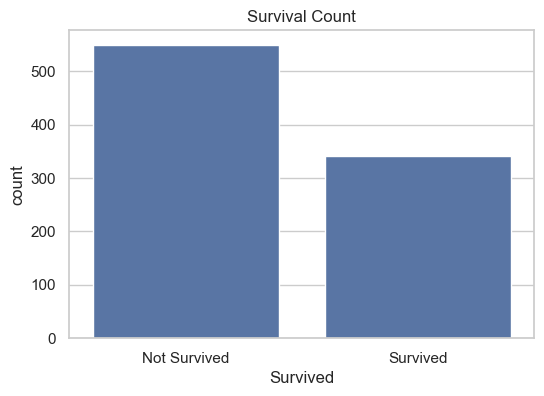

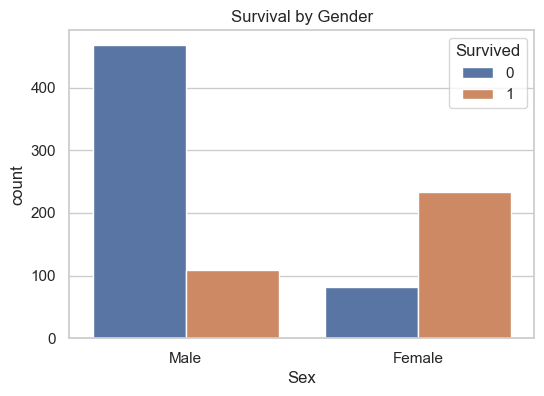

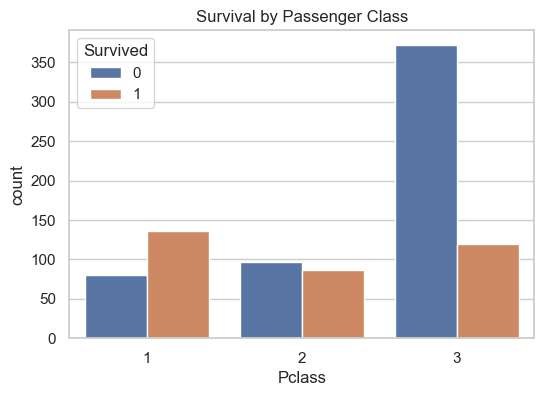

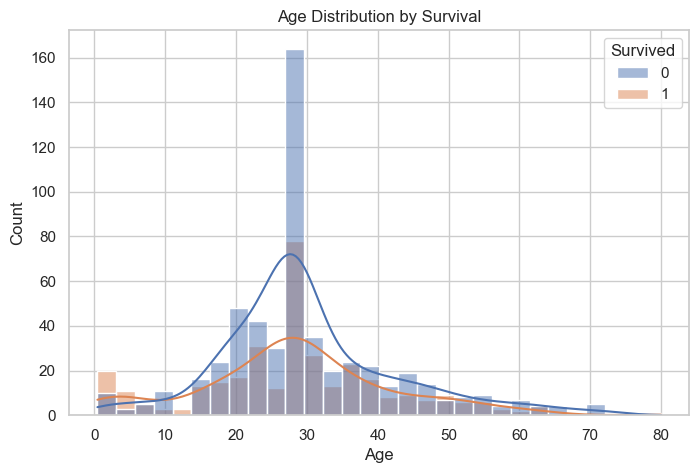

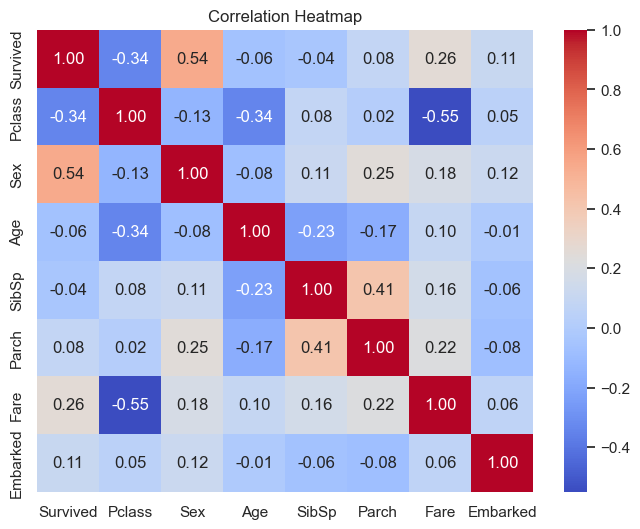

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
df = pd.read_csv("train.csv")
print("First 5 rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())
df = df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'])
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
print("\nSummary statistics:")
print(df.describe())
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
